# Mini-Project 1: Machine Learning 101

Christian Martel (260867191)

Luka Loignon (260871296)

Marie Guertin (260870552)

# PART I: Adult Dataset

Prediction task is to determine whether someone makes over 50K a year.
https://archive.ics.uci.edu/ml/datasets/Adult

## Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

# other py files
import my_validation
import my_preprocessing

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
np.random.seed(1234)

## Data Preprocessing

### 1. Import Data

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
train_df = pd.read_csv("data/adult.data", usecols = range(15), names = columns)
test_df = pd.read_csv("data/adult.test", usecols = range(15), names = columns)
display(train_df)
display(test_df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


### 2. Strip the Object Data

Categorical data is not stripped, labels contain left white spaces.

In [3]:
train_df = my_preprocessing.strip_labels(train_df)
test_df = my_preprocessing.strip_labels(test_df)

### 3. Remove Useless Columns and Rows

From the imported datasets, we observe that the capital-gain and capital-loss columns contain mostly zeros. These columns are not important features so they will be removed.

We can observe that the first row of the test dataset contains junk data, so this row will be removed.

In [4]:
# remove columns with too much missing data
train_df.drop(columns = ['capital-gain', 'capital-loss'], inplace = True)
test_df.drop(columns = ['capital-gain', 'capital-loss'], inplace = True)

# remove first row containing junk data
test_df.drop(labels=0, inplace = True)

### Check all unique values per feature

In [5]:
# print unique values for each column
for c in train_df.columns:
    print("{c}: ".format(c=c), train_df[c].unique())

age:  [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass:  ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt:  [ 77516  83311 215646 ...  34066  84661 257302]
education:  ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num:  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status:  ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation:  ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'

### 4. Data Imputation

For continuous data: replace Nan values or invalid values with mean value of column

For categorical data: replace Nan values or invalid values with most occurring features

In [6]:
# map the invalid entries for each column
invalid_entries_dict = {
    'age':[],
    'workclass':['?'],
    'fnlwgt':[],
    'education':[],
    'education-num':[],
    'marital-status':[],
    'occupation':['?'],
    'relationship':[],
    'race':[],
    'sex':[],
    'hours-per-week':[],
    'native-country':['?']
}
train_df = my_preprocessing.imputation(train_df, invalid_entries_dict)
test_df = my_preprocessing.imputation(test_df, invalid_entries_dict)

### 5. Categorical Features One-Hot-Encoding 

In [7]:
# pop prediction column
y_train, y_test = train_df.pop('salary'), test_df.pop('salary')

# one-hot-encode categorical features
train_df = my_preprocessing.ohe(train_df)
test_df = my_preprocessing.ohe(test_df)
        
# add back prediction column
train_df, test_df = pd.concat([train_df, y_train],axis=1), pd.concat([test_df, y_test],axis=1)
display(train_df)

,age,fnlwgt,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary
0,39,77516,13,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,<=50K
1,50,83311,13,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,<=50K
2,38,215646,9,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,<=50K
3,53,234721,7,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,<=50K
4,28,338409,13,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

### 6. Check feature correlation with prediction

In [ ]:
# feature correlations
train_df['age'].corr(train_df['salary'])
    

## Experiments

### 1. KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# convert to numpy arrays
train, test = train_df.to_numpy(), test_df.to_numpy()

# random permutations of indices
inds = np.random.permutation(range(train.shape[0]))

# split into features set and prediction set
x, y = train[inds, :-1], train[inds, -1]
x_test, y_test = test[:, :-1], test[:, -1]

# number of folds for L-fold cross-validation
L = 5

# range of number of nearest neighbors (K)
K_list = range(1,16) # [1,2,...,15]

#### Cross-Validation

In [12]:
# knn cross-validation on full dataset
err_val_matrix, err_train_matrix = my_validation.knn_cross_validation(x, y, K_list, L, my_validation.error_rate)
err_val_means = np.mean(err_val_matrix, axis=1)

# Visualize
plt.title('Error Rate of KNN for Different K Values with Full Dataset')
plt.plot(K_list, np.mean(err_train_matrix, axis=1),  label='train')
plt.errorbar(K_list, np.mean(err_matrix, axis=1), np.std(err_matrix, axis=1), label='validation')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('Error Rate')
plt.ylim(0,0.5)
plt.show()

# The best K parameter is the one providing the smallest error rate
best_k = K_list[err_val_means.index(min(err_val_means))]
print("Best K parameter: {%k}".format(k=best_k))

KeyboardInterrupt: 

#### Sample Growing Data

Observe the effect of growing the sample size on the training and validation errors.

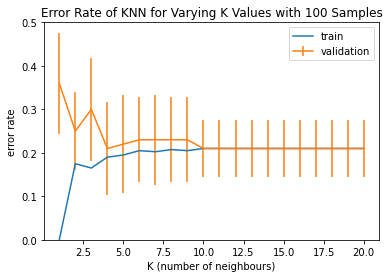

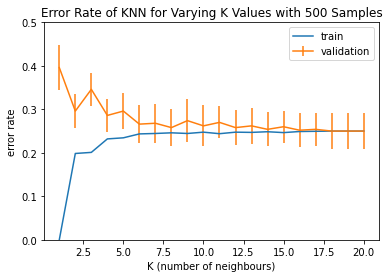

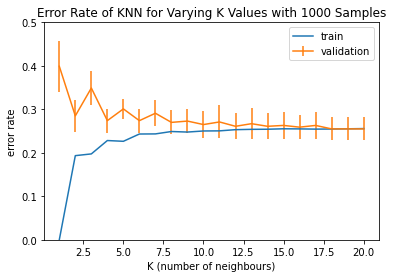

KeyboardInterrupt: 

In [11]:
sizes = [100, 500, 1000, 5000]

# K range list
K_list = range(1,21)

for s in sizes:
    # select s random samples from train dataset
    x_subset, y_subset = x[inds[:s]], y[inds[:s]]
    
    # apply cross validation to get validation and train accuracy matrices 
    err_val_matrix, err_train_matrix = my_validation.knn_cross_validation(x_subset, y_subset, K_list, L, my_validation.error_rate)
    
    err_val_means = np.mean(err_val_matrix, axis=1)
    
    plt.title('Error Rate of KNN for Varying K Values with {size} Samples'.format(size = s))
    plt.plot(K_list, np.mean(err_train_matrix, axis=1),  label='train')
    plt.errorbar(K_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
    plt.legend()
    plt.xlabel('K (number of neighbours)')
    plt.ylabel('error rate')
    plt.ylim(0,0.5)
    plt.show()

#### Use Best Parameter on Test Set

In [ ]:
model = KNeighborsClassifier(n_neighbors=best_k)
start_time = time.time()
model.fit(x_train, y_train)
tr_time = time.time() - start

y_pred = model.predict(x_test)
pred_time = time.time() - tr_time

err_rate = my_validation.error_rate(y_test, y_pred)

print("Error Rate on Test Set: {err_rate}".format(err_rate=err_rate))
print("Training time: {tr_time}".format(tr_time=tr_time))
print("Prediction time: {pred_time}".format(pred_time=pred_time))

### 2. DECISION-TREE

#### Cross-Validation

#### Sample-Growing Data

#### Use Best Parameter Combination on Test Set